In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy  as np

#### Utility Functions

In [2]:
def meanOfArray(np_arr) -> int:
    """
    Calculates the mean of the particular array
    :param np_arr: numpy array
    :return: mean
    """
    arr = [int(cell) for row in np_arr for cell in row ]
    return sum(arr)//len(arr)

In [3]:
def PSNR(np_image1: np.ndarray, np_image2: np.ndarray) -> float:
    """
    Calculates the PSNR of two images.
    :param np_image1: numpy array of image 1
    :param np_image2: numpy array of image 2
    :return: PSNR
    """
    mse = np.mean(np.square(np_image1 - np_image2))
    return 10 * np.log10(255**2 / mse)

In [4]:
def MSE_Plot(np_image_1, np_image_2):
    nSize = np_image_1.shape[0]
    np_diff = np.zeros((nSize, nSize), dtype=np.uint8)
    for i in range(nSize):
        for j in range(nSize):
            a = int(np_image_1[i][j])
            b = int(np_image_2[i][j])
            np_diff[i][j] = (a- b)**2
    plt.imshow(np_diff)

In [5]:
def getNpArray(image_path) -> np.ndarray:
    return np.array(Image.open(image_path))

### Assignment

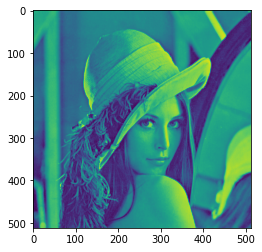

In [6]:
lena_gray_512 = np.asarray(Image.open('standard_test_images/lena_gray_512.tif'))
plt.imshow(lena_gray_512)

## Task 1 Downsample the image

In [7]:
def downscale(np_image: np.ndarray , new_size: int) -> np.ndarray:
    """
    Downscale an image to a new size.
    :param np_image: numpy array of image
    :param new_size: new size of image
    :return: downscaled image
    """
    downscaled_image = np.zeros((new_size, new_size), dtype=np.uint8)
    fact = np_image.shape[0]//new_size
    for i in range(new_size):
        for j in range(new_size):
            start_x, start_y = i*fact, j*fact
            downscaled_image[i][j] = meanOfArray(
                np_image[start_x: start_x + fact, start_y: start_y + fact]
            )
    return downscaled_image

In [8]:
reduced_lena_256 = downscale(lena_gray_512, 256)

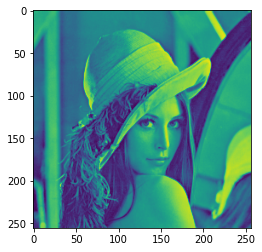

In [9]:
plt.imshow(reduced_lena_256)

## Task 2 Comparing PSNR Value of both images

In [10]:
lena_256 = getNpArray('standard_test_images/lena_gray_256.tif')
PSNR(reduced_lena_256, lena_256)

34.65990764173102

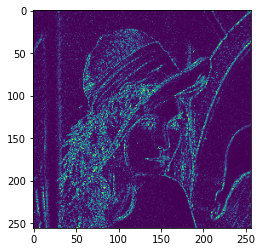

In [11]:
MSE_Plot(reduced_lena_256, lena_256)

## Task 3 Scale up the image

#### Using Nearest Neighbour Interpolation

In [12]:
def nearestNeighborInterpolation(np_image: np.ndarray, new_size: int) -> np.ndarray:
    """
    Nearest neighbor interpolation.
    :param np_image: numpy array of image
    :param new_size: new size of image
    :return: nearest neighbor interpolated image
    """
    new_image = np.zeros((new_size, new_size), dtype=np.uint8)
    for i in range(new_size):
        for j in range(new_size):
            new_image[i][j] = np_image[int(i/new_size*np_image.shape[0])][int(j/new_size*np_image.shape[1])]
    return new_image

In [13]:
lena_512_NNI = nearestNeighborInterpolation(reduced_lena_256, 512)

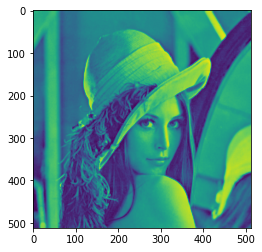

In [14]:
plt.imshow(lena_512_NNI)

#### Using Bilinear Interpolation

In [15]:
def bilinearInterpolation(np_image: np.ndarray, new_size: int) -> np.ndarray:
    """
    Bilinear interpolation.
    :param np_image: numpy array of image
    :param new_size: new size of image
    :return: bilinear interpolated image
    """
    downscaled_image = np.zeros((new_size, new_size), dtype=np.uint8)
    old_size = np_image.shape[0]
    fact = new_size//old_size

    # adding default values to new image
    for i in range(old_size):
        for j in range(old_size):
            downscaled_image[i*fact][j*fact] = np_image[i][j]
    
    # interpolating values from horizontal neighbours
    for i in range(old_size):
        for j in range(old_size-1):
            diff = (int(np_image[i][j+1]) - int(np_image[i][j]))/fact
            for k in range(1,fact):
                downscaled_image[i*fact][j*fact+k] = int(np_image[i][j] + diff*k)
    
    # interpolating values from vertical neighbours
    for i in range(old_size-1):
        for j in range(new_size-1):
            diff = (int(downscaled_image[(i+1)*fact][j]) - int(downscaled_image[i*fact][j]))/fact
            for k in range(1,fact):
                downscaled_image[i*fact+k][j] = int(downscaled_image[i*fact][j] + diff*k)
    
    # adding padding to the image
    for i in range(new_size):
        for j in range(fact-1):
            downscaled_image[i][new_size-1-j] = downscaled_image[i][new_size-2-fact]
            downscaled_image[new_size-1-j][i] = downscaled_image[new_size-2-fact][i]
    
    return downscaled_image

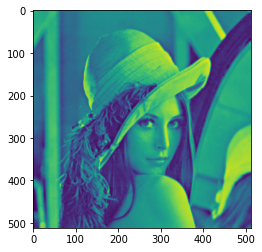

In [16]:
lena_512_BLI = bilinearInterpolation(reduced_lena_256, 512)
plt.imshow(lena_512_BLI)

## Task 4 Computing the PSNR values

In [17]:
PSNR(lena_gray_512, lena_512_NNI)

34.92438504331985

In [18]:
PSNR(lena_gray_512, lena_512_BLI)

34.163047840897015

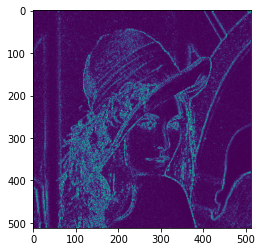

In [19]:
MSE_Plot(lena_gray_512, lena_512_NNI)

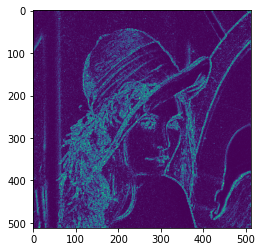

In [20]:
MSE_Plot(lena_gray_512, lena_512_BLI)